## Atelier 1 : Apprentissage non supervisé avec Python ##

In [46]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


### I. Réduction de dimensions et Visualisation des données

#### Question 1

In [129]:
data = pd.read_csv("villes.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values


In [130]:
from sklearn.preprocessing import StandardScaler #On centre et normalise avant de faire l'ACP
sc=StandardScaler()
X=sc.fit_transform(X)

In [131]:
from sklearn import datasets
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)


PCA()

In [132]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

In [133]:
pca.components_

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688],
       [ 0.04409365,  0.03948181,  0.53570204,  0.5113345 ,  0.23821244,
         0.05381216, -0.22933643, -0.25421533, -0.27486626, -0.3536259 ,
        -0.25411937, -0.07756511],
       [-0.1558089 ,  0.07307363,  0.54015114, -0.07666717, -0.3189685 ,
        -0.30424435, -0.06181967,  0.16879935,  0.35726159,  0.2857622 ,
        -0.15061539, -0.46275418],
       [ 0.2584192 ,  0.15926626,  0.1946403 , -0.18824458, -0.55146666,
         0.31127222,  0.43376098,  0.16314861, -0.21810887, -0.32453688,
        -0.24260357,  0.08371863],
       [ 0.43776933,  0.37595552, -0.38220213,  0.1890633 ,  0.17724002,
        -0.37334457,  

In [134]:
X_pca = pca.transform(X)
print(X_pca)

[[ 5.18728058  0.75978942 -0.57559749  0.08974014 -0.07159801 -0.00586024
  -0.16452149  0.06412266 -0.06895496  0.03532137  0.00391946  0.02406588]
 [-0.88778562  0.76987811  0.11886913 -0.04735606  0.13112443  0.02593166
  -0.07411571 -0.0031485  -0.02937015  0.01388333 -0.00287694 -0.01881081]
 [ 0.40607702  0.4849017   0.36946008  0.16872505 -0.10529304  0.13382185
   0.20573072 -0.01948275 -0.01749997  0.00188401 -0.00004347  0.02188452]
 [-2.9237469  -0.91316957 -0.05478276  0.07625388 -0.13825046 -0.09869485
  -0.04690669 -0.00202443  0.04519103 -0.0017481  -0.00222491  0.00254859]
 [ 3.11703576  2.02750003  0.21990117  0.3231507  -0.08944422 -0.07823654
   0.00776009 -0.05772279 -0.01130301 -0.06813079  0.02976282 -0.00983999]
 [ 2.9532451  -0.19259391  0.66797016  0.16410596 -0.10319012  0.02051635
  -0.08933938  0.14942636  0.01232084  0.0020756  -0.0065336   0.00154085]
 [-2.14172992  3.89449982 -0.11764597 -0.04334357  0.01695231 -0.11660698
   0.01727085 -0.02864372  0.092

Pour retenir au moins 90% de l'information présente dans le nuage initial, il faut retenir au moins deux axes.
Le premier axe représente représente la température moyenne de l'année
Le second axe représente la variabilité de température au cours de l'année (valeurs faibles = très chaud été et très froid hiver, valeurs fortes = plus équilibré tout au long de l'année, pas trop froid l'hiver, pas trop chaud l'hiver

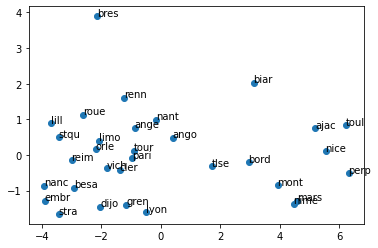

In [135]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Question 2

In [136]:
data = pd.read_csv("crimes.csv", sep=';')
Y = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
print(data.columns)

Index(['Etat ', 'Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin',
       'Auto_Theft'],
      dtype='object')


In [137]:
sc=StandardScaler()
Y=sc.fit_transform(Y)
pca = decomposition.PCA()
pca.fit(Y)

PCA()

In [138]:
pca.explained_variance_

array([4.19893828, 1.26400187, 0.74062921, 0.32288984, 0.26323924,
       0.22657089, 0.12658781])

In [139]:
pca.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [140]:
pca.components_
#pour connaitre le seuil d'acceptabilité, on fait 1/racine(nbr de variables) = 1/racine(8) = 0.35

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832],
       [ 0.53812286,  0.18847069, -0.51997683, -0.50665138,  0.10103335,
         0.03009857,  0.36975317],
       [-0.25911677,  0.77327066,  0.11438481, -0.17236294, -0.53598716,
        -0.03940645,  0.05729763],
       [-0.26759277,  0.29648548,  0.00390268, -0.19174459,  0.64811708,
        -0.60169004, -0.14704626]])

In [141]:
Y_pca = pca.transform(Y)
print(Y_pca)

[[-0.05038664 -2.11738312  0.50673755  0.25353338  0.50354699 -0.43802073
  -0.11927372]
 [ 2.44609952  0.16821368 -0.07043914  1.17225334  1.48497546  1.5130117
  -0.4695271 ]
 [ 3.04473945  0.85352343 -1.76973694 -0.11739168  0.28305576 -1.08130788
  -0.05809892]
 [-1.06511538 -1.35910001 -0.01852361  0.02175501  0.02291857  0.38995629
   0.31381927]
 [ 4.32729524  0.14464111  0.27895861  0.02537684  0.05851924  0.38091296
   0.46872442]
 [ 2.53476822  0.92590218 -1.16327185  0.1137457  -0.17095008  0.33439562
   0.24310306]
 [-0.54682536  1.51647081  0.79184365  0.08706541  0.18676319 -0.28425702
   0.09053461]
 [ 0.9743736   1.30990789 -0.53120357 -0.4215613  -0.01891462 -0.40765813
  -0.20825779]
 [ 3.1433462  -0.61004794 -1.22774473  0.50010147 -0.82798767 -0.29252483
  -0.36230163]
 [ 0.49538648 -1.39480696  0.24711306 -0.06310967  0.20415297 -0.02604376
   0.33558165]
 [ 0.8314882   1.84243558 -0.78969418 -1.19223308  1.10439208 -0.55045425
   0.10132192]
 [-1.44699704 -0.00808

On peut ne retenir que deux axes (deux valeurs propres supérieures à 1).
Le premier axe est une moyenne pondérée de toutes les variables (il semble donc qu'il y ait une corrélation positive entre elles : plus un état a un nombre élevé de crimes dans une catégorie, plus il va avoir tendance à avoir un nombre important de crimes dans l'ensembles des cétagories)
Le second axe est principalement un agrégé des variables Meutre et Attaque (négativement) et Viol, Larcin et Auto_Theft (positivement). Un état avec une valeur élevée sur cette axe  a donc tendance à avoir un nombre plus élevé de Viol/Larcin/AUto_Theft et moins élevé de Meurtre et Attaque. Et inversement.

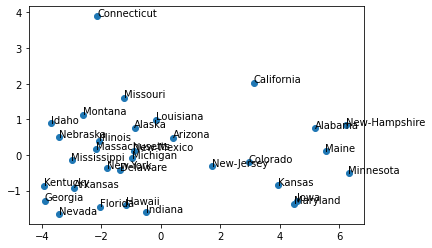

In [142]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Question 3

In [143]:
data = pd.read_csv("50_Startups.csv", sep=';')
Z = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
print(data.columns)

Index(['Id', 'Depenses R&D', 'Depenses Administration',
       'Depenses Marketing Spend', 'Benefice'],
      dtype='object')


In [144]:
sc=StandardScaler()
Z=sc.fit_transform(Z)
pca = decomposition.PCA()
pca.fit(Z)

PCA()

In [145]:
pca.explained_variance_ratio_

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

In [146]:
pca.components_

array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069],
       [-0.39681837,  0.2723039 ,  0.79581463, -0.36751167],
       [ 0.69905629, -0.02558964,  0.0275629 , -0.71407686]])

On retient deux axes (car on dépasse 90% avec les deux premières variables).
Le premier axe représente un agrégé des variables Depenses R&D, Depenses Administration et Benefice. Il semble donc y avoir une corrélation entre ces variables.
Le second représente négativement les dépenses en Administratation (beaucoup de dépenses en administration = valeur faible)

In [147]:
Z_pca = pca.transform(Z)
print(Z_pca)

[[ 3.59907884  0.06143503  0.3275448   0.01845081]
 [ 3.5131408  -0.50334595  0.31474663 -0.03517885]
 [ 2.96089965  1.1346433  -0.32803913 -0.12460696]
 [ 2.70753018  0.47788583 -0.16432273 -0.14010092]
 [ 2.21016916  1.36881155 -0.37037983  0.14546238]
 [ 1.96975996  1.07940343 -0.13537945  0.14414273]
 [ 1.23305257 -1.14520803 -1.23185244  0.10456305]
 [ 2.00589832 -0.58521441  0.08235952  0.09096667]
 [ 1.78981683 -0.71756422  0.15085671 -0.00147905]
 [ 1.54839968  0.63484284 -0.28763549  0.12078736]
 [ 0.898392    0.39484327 -0.54667751 -0.16268534]
 [ 0.8429801   1.09240842 -0.56798052 -0.12641134]
 [ 0.90333375 -0.11930524 -0.13445705 -0.21605404]
 [ 0.82580257 -0.39174786  0.04775081 -0.12149008]
 [ 1.2938108  -1.1285877   0.05134742  0.32046229]
 [ 1.02526869  0.05199711 -0.17510777  0.31765262]
 [ 0.51039797  0.12552743  0.17754353 -0.19016359]
 [ 0.90670565 -0.64784045  0.39748652  0.07741092]
 [ 0.74114236  0.44497758  0.21081564  0.08374354]
 [-0.41004248 -1.64887931 -1.28

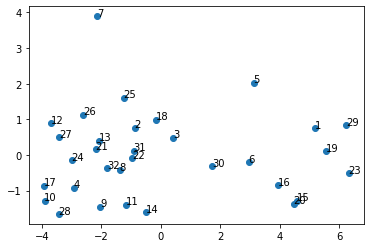

In [148]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## II. Clustering

In [149]:
data = pd.read_csv("villes.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

#### Question 1

In [150]:
from sklearn.cluster import KMeans
sc=StandardScaler()
X=sc.fit_transform(X)

kmeans = KMeans(n_clusters=3).fit(X)
clustering = kmeans.labels_

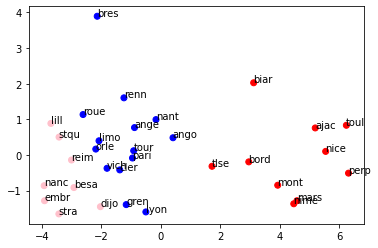

In [151]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Question 2

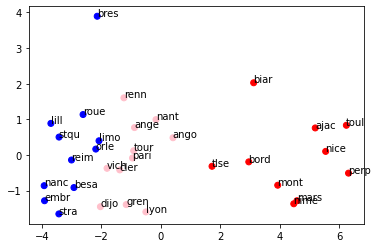

In [152]:
from sklearn.cluster import AgglomerativeClustering

kmeans = AgglomerativeClustering(n_clusters=3, linkage = 'ward').fit(X)
clustering = kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

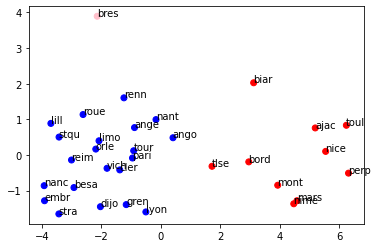

In [153]:
kmeans = AgglomerativeClustering(n_clusters=3, linkage = 'average').fit(X)
clustering = kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Question 3

In [154]:
from sklearn import metrics
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(X)
 print(metrics.silhouette_score(X, clustering,metric='euclidean'))
 print()

0.625557719180767

0.38809425947195875

0.36151471170277005

0.320426835006724



Le clustering avec deux classes obtient le meilleur score : c'est donc celui à privilégier